Exercise 2:Continue with Class 6 Exercise 4. Open data.csv, add a new column (categories for
calories: few, normal or high). Apply label encoding / ordinal encoding / one-hot encoding to this
new feature. Study correlation between duration and encoded calories features.

In [43]:
#Importing needed libraries
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')


# label encoding

In [36]:
#import  data
df = pd.read_csv("data.csv")
#fitch the last column
stringCol = df.iloc[:,-1]
# apply label incoding to the last column
encoder = LabelEncoder()
encoder.fit(stringCol)
encoder.transform(stringCol)

array([1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1,
       2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2,
       0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
       1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1,
       2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2,
       0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
       1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1,
       2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1])

In [37]:
#Replace cat_calories values with encoded labels
df["cat_calories"].replace(to_replace=df["cat_calories"].tolist(), 
                      value=encoder.transform(stringCol),
                      inplace = True)
df.head()

,Duration,Pulse,Maxpulse,Calories,cat_calories
0,60,110,130,409.1,1
1,60,117,145,479.0,2
2,60,103,135,340.0,0
3,45,109,175,282.4,1
4,45,117,148,406.0,2


In [38]:
# Study correlation between duration and encoded calories features

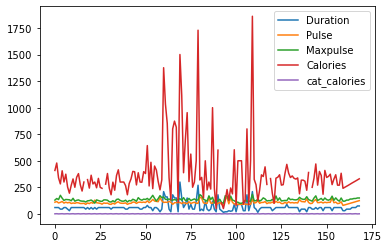

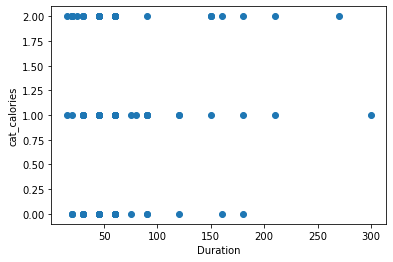

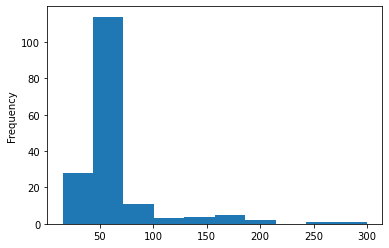

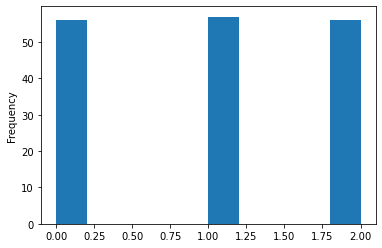

In [42]:
#Visualizing data
df.plot()
plt.show()
# scatter plot for two attributes
df.plot(kind = 'scatter', x = 'Duration', y = 'cat_calories')
plt.scatter(x = df['Duration'], y = df['cat_calories'])
plt.show()


df["Duration"].plot(kind = 'hist') 
plt.show()
df["cat_calories"].plot(kind = 'hist') 
plt.show()

              Duration     Pulse  Maxpulse  Calories  cat_calories
Duration      1.000000 -0.155408  0.009403  0.922717      0.068076
Pulse        -0.155408  1.000000  0.786535  0.025121      0.088425
Maxpulse      0.009403  0.786535  1.000000  0.203813      0.009306
Calories      0.922717  0.025121  0.203813  1.000000      0.110278
cat_calories  0.068076  0.088425  0.009306  0.110278      1.000000


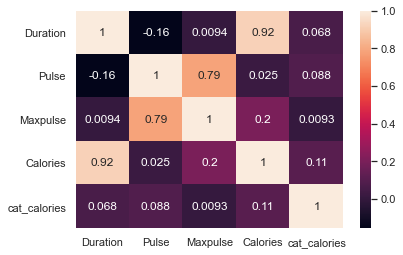

In [56]:
#Correlation matrix
corrMatrix = df.corr()
print (corrMatrix)

#Visualizing correlation matrix
sns.heatmap(corrMatrix, annot=True)
plt.show()

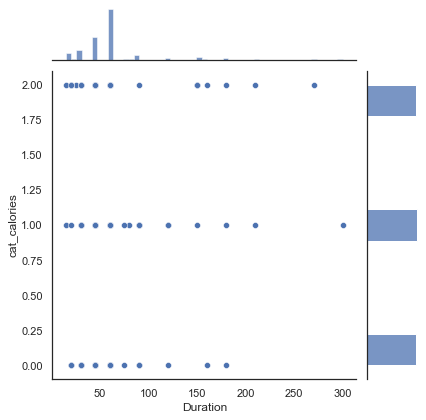

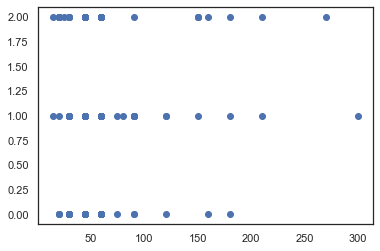

Correlation between Duration and cat_calories: 0.07
Independent t-test: 19.31084677344036 2.0072780779156934e-56


In [58]:
#Analysing correlation between Duration and cat_calories
sns.jointplot(x="Duration", y="cat_calories", data=df)
plt.show()

plt.scatter(x="Duration", y="cat_calories", data=df)
plt.show()

#Correlation coefficient
corr= np.corrcoef(df["Duration"], df["cat_calories"])[0,1]
print("Correlation between Duration and cat_calories:",round(corr,2))

#Significance of correlation coefficient
ttest, pval =stats.ttest_ind(df["Duration"], df["cat_calories"])
print("Independent t-test:", ttest, pval)


# ordinal encoding 

In [60]:
#import data
df = pd.read_csv("data.csv")

# Create dictionary for mapping the ordinal numerical value
Cat_cal_dict = {'high':1, 'normal':2, 'few':3}
#replace values in "cat_calories" column with the dic values "1 or 2 or 3"
df['cat_calories'] = df.cat_calories.map(Cat_cal_dict)
df

,Duration,Pulse,Maxpulse,Calories,cat_calories
0,60,110,130,409.1,1
1,60,117,145,479.0,2
2,60,103,135,340.0,3
3,45,109,175,282.4,1
4,45,117,148,406.0,2
...,...,...,...,...,...
164,60,105,140,290.8,3
165,60,110,145,300.0,1
166,60,115,145,310.2,2
167,75,120,150,320.4,3


              Duration     Pulse  Maxpulse  Calories  cat_calories
Duration      1.000000 -0.155408  0.009403  0.922717     -0.099717
Pulse        -0.155408  1.000000  0.786535  0.025121      0.019238
Maxpulse      0.009403  0.786535  1.000000  0.203813      0.003109
Calories      0.922717  0.025121  0.203813  1.000000     -0.098119
cat_calories -0.099717  0.019238  0.003109 -0.098119      1.000000


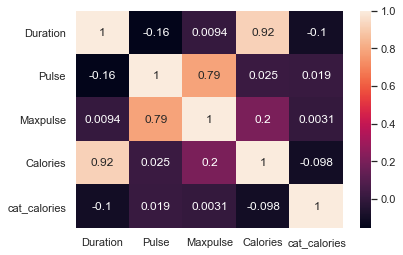

In [61]:
# Study correlation between duration and encoded calories features
#Correlation matrix
corrMatrix = df.corr()
print (corrMatrix)

#Visualizing correlation matrix
sns.heatmap(corrMatrix, annot=True)
plt.show()

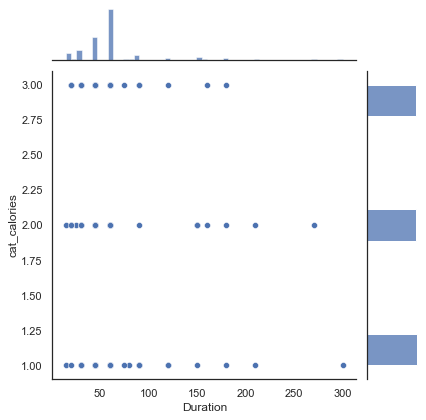

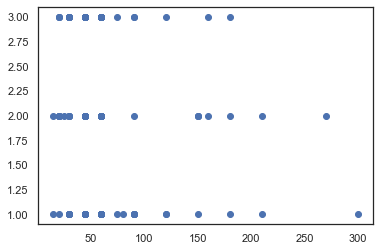

Correlation between Duration and cat_calories: -0.1
Independent t-test: 19.00536180011362 3.316099704011846e-55


In [62]:
#Analysing correlation between Duration and cat_calories
sns.jointplot(x="Duration", y="cat_calories", data=df)
plt.show()

plt.scatter(x="Duration", y="cat_calories", data=df)
plt.show()

#Correlation coefficient
corr= np.corrcoef(df["Duration"], df["cat_calories"])[0,1]
print("Correlation between Duration and cat_calories:",round(corr,2))

#Significance of correlation coefficient
ttest, pval =stats.ttest_ind(df["Duration"], df["cat_calories"])
print("Independent t-test:", ttest, pval)


# one-hot encoding

In [64]:
#import data
df = pd.read_csv("data.csv")

#Instantiate the OneHotEncoder object
#The parameter drop = ‘first’ will handle dummy variable traps
onehotencoder = OneHotEncoder(sparse=False, handle_unknown='error', 
                              drop='first')

#Perform one-hot encoding
onehotencoder_df = pd.DataFrame(onehotencoder.fit_transform(df[["cat_calories"]]))
onehotencoder_df

#Merge one-hot encoding columns with dataframe
df = df.join(onehotencoder_df)
df.drop(columns=['cat_calories'], inplace=True)
df

,Duration,Pulse,Maxpulse,Calories,0,1
0,60,110,130,409.1,1.0,0.0
1,60,117,145,479.0,0.0,1.0
2,60,103,135,340.0,0.0,0.0
3,45,109,175,282.4,1.0,0.0
4,45,117,148,406.0,0.0,1.0
...,...,...,...,...,...,...
164,60,105,140,290.8,0.0,0.0
165,60,110,145,300.0,1.0,0.0
166,60,115,145,310.2,0.0,1.0
167,75,120,150,320.4,0.0,0.0


In [65]:
#One-hot encoding using scikit-learn
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv("data.csv")

#Instantiate the OneHotEncoder object
#The parameter drop = ‘first’ will handle dummy variable traps
onehotencoder = OneHotEncoder(sparse=False, handle_unknown='error', 
                              drop='first')

#Perform one-hot encoding
onehotencoder_df = pd.DataFrame(onehotencoder.fit_transform(df[["cat_calories"]]))
onehotencoder_df

# #Merge one-hot encoding columns with dataframe
df = df.join(onehotencoder_df)
#drop 'cat_calories' 
df.drop(columns=['cat_calories'], inplace=True)
df

,Duration,Pulse,Maxpulse,Calories,0,1
0,60,110,130,409.1,1.0,0.0
1,60,117,145,479.0,0.0,1.0
2,60,103,135,340.0,0.0,0.0
3,45,109,175,282.4,1.0,0.0
4,45,117,148,406.0,0.0,1.0
...,...,...,...,...,...,...
164,60,105,140,290.8,0.0,0.0
165,60,110,145,300.0,1.0,0.0
166,60,115,145,310.2,0.0,1.0
167,75,120,150,320.4,0.0,0.0


          Duration     Pulse  Maxpulse  Calories         0         1
Duration  1.000000 -0.155408  0.009403  0.922717  0.075902  0.020750
Pulse    -0.155408  1.000000  0.786535  0.025121 -0.072935  0.113093
Maxpulse  0.009403  0.786535  1.000000  0.203813 -0.008927  0.012531
Calories  0.922717  0.025121  0.203813  1.000000  0.049997  0.070537
0         0.075902 -0.072935 -0.008927  0.049997  1.000000 -0.502208
1         0.020750  0.113093  0.012531  0.070537 -0.502208  1.000000


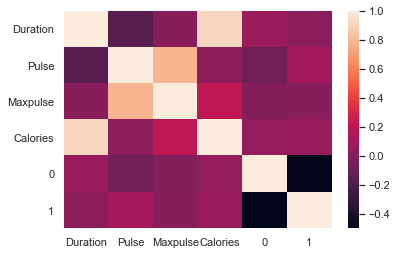

In [68]:
# Study correlation between duration and encoded calories features
#Correlation matrix
corrMatrix = df.corr()
print (corrMatrix)

#Visualisation of correlation matrix
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()